In [1]:
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
import numpy as np

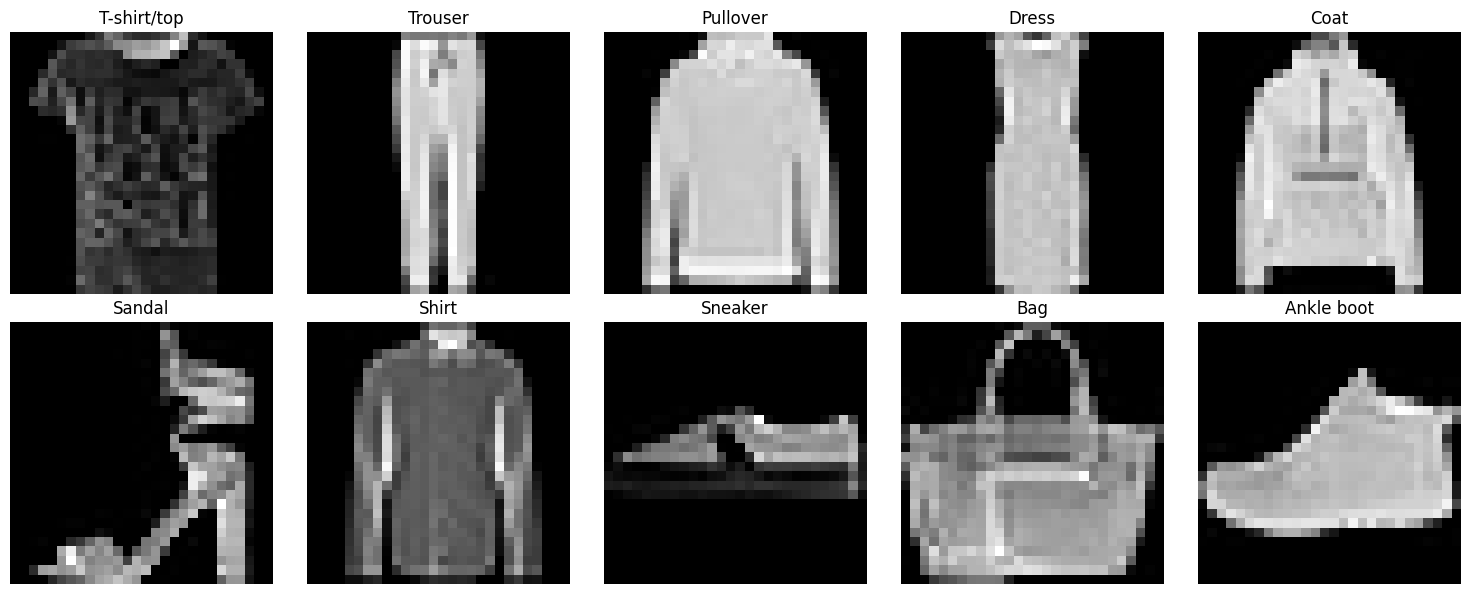

In [2]:
################### Preprocessing #######################
def load_data():
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
    return x_train, y_train, x_test, y_test, class_names

def plot_samples(x_train, y_train, class_names):
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    for i in range(10):
        indices = (y_train == i).nonzero()[0]
        idx = np.random.choice(indices)
        ax = axes[i // 5, i % 5]
        ax.imshow(x_train[idx], cmap='gray')
        ax.set_title(class_names[i])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

x_train, y_train, x_test, y_test, class_names = load_data()
plot_samples(x_train, y_train, class_names)

In [ ]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_layers, output_size):
        """
        Initializes the feedforward neural network.

        Args:
            input_size (int): Size of the input layer (e.g., 784 for Fashion-MNIST).
            hidden_layers (list): List of integers representing the number of neurons in each hidden layer.
            output_size (int): Size of the output layer (e.g., 10 for Fashion-MNIST).
        """
        self.input_size = input_size
        self.hidden_layers = hidden_layers
        self.output_size = output_size
        self.num_hidden_layers = len(hidden_layers)
        self.weights = []
        self.biases = []

        # Initialize weights and biases for hidden layers
        layer_sizes = [input_size] + hidden_layers
        for i in range(self.num_hidden_layers):
            self.weights.append(np.random.randn(layer_sizes[i], layer_sizes[i + 1]) * 0.01)
            self.biases.append(np.zeros((1, layer_sizes[i + 1])))

        # Initialize weights and biases for the output layer
        self.weights.append(np.random.randn(hidden_layers[-1], output_size) * 0.01)
        self.biases.append(np.zeros((1, output_size)))

    def sigmoid(self, z):
        """Sigmoid activation function."""
        return 1 / (1 + np.exp(-z))

    def softmax(self, z):
        """Softmax activation function."""
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def forward(self, X):
        """
        Performs forward propagation.

        Args:
            X (numpy.ndarray): Input data.

        Returns:
            numpy.ndarray: Output probability distribution.
        """
        activations = [X]  # Store activations of each layer

        # Hidden layers
        for i in range(self.num_hidden_layers):
            z = np.dot(activations[-1], self.weights[i]) + self.biases[i]
            a = self.sigmoid(z)
            activations.append(a)

        # Output layer
        z = np.dot(activations[-1], self.weights[-1]) + self.biases[-1]
        output = self.softmax(z)
        return output

In [ ]:
# Example usage
if __name__ == "__main__":
    # Load Fashion-MNIST data
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

    # Flatten and normalize images
    train_images = train_images.reshape(train_images.shape[0], -1).astype('float32') / 255.0
    test_images = test_images.reshape(test_images.shape[0], -1).astype('float32') / 255.0

    # Network parameters
    input_size = 784
    hidden_layers = [128, 64]  # Example: two hidden layers with 128 and 64 neurons
    output_size = 10

    # Create the network
    network = FeedforwardNeuralNetwork(input_size, hidden_layers, output_size)

    # Perform forward propagation on a sample image
    sample_image = train_images[0:1]  # Select the first training image
    output_probabilities = network.forward(sample_image)

    print("Output probabilities:", output_probabilities)
    print("Shape of output probabilities:", output_probabilities.shape)